<a href="https://colab.research.google.com/github/ocbyram/assignment4/blob/main/Assignment4_OliviaByram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment #4: Linear Models and Decision Trees
## Foundations of Machine Learning
## Do Q1 and one other question.
### Advice: Reuse your code and code from lectures, package routine tasks into functions, make plans about how you'll carry out the analysis before jumping into writing code, and work as efficiently as possible

**I did q1 and q3. I swear I did the best that I could on question 1, but my rsquared and rmse's are fairly bad. I talked about this and included possible explanations.**

In [ ]:
! git clone https://www.github.com/DS3001/assignment4

Cloning into 'assignment4'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (2/2), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 8 (delta 0), reused 0 (delta 0), pack-reused 6
Receiving objects: 100% (8/8), 265.63 KiB | 3.74 MiB/s, done.


**Q1.** This question is a case study for linear models and decision trees. The data are about car prices. In particular, they include:

  - `Price`, `Color`, `Seating_Capacity`
  - `Body_Type`: crossover, hatchback, muv, sedan, suv
  - `Make`, `Make_Year`: The brand of car and year produced
  - `Mileage_Run`: The number of miles on the odometer
  - `Fuel_Type`: Diesel or gasoline/petrol
  - `Transmission`, `Transmission_Type`:  speeds and automatic/manual

  1. Load `cars_hw.csv`. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.
  2. Summarize the `Price` variable and create a kernel density plot. Use `.groupby()` and `.describe()` to summarize prices by brand (`Make`). Make a grouped kernel density plot by `Make`. Which car brands are the most expensive? What do prices look like in general?
  3. Split the data into an 80% training set and a 20% testing set.
  4. Let's focus on linear models. Make a model where you regress price on the numeric variables alone; what is the $R^2$ and `RMSE` on the test set? Make a second model where, for the categorical variables, make a model comprised of one-hot encoded regressors/features alone, and regress price on those variables; what is the $R^2$ and `RMSE` on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the $R^2$ and `RMSE` on the test set? Does the joint model perform better or worse, and by home much?
  5. Use the `PolynomialFeatures` function from `sklearn` to expand the set of numerical variables you're using, along with the categorical variables. As you increase the degree of the expansion, how do the $R^2$ and `RMSE` change? At what point does $R^2$ go negative on the test set? For your best model with expanded features, what is the $R^2$ and `RMSE`? How does it compare to your best model from part 3?
  6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.
  7. Now, let's use a regression tree. Construct an appropriate matrix of regressors/features, and fit a tree to the data. Vary the maximum depth of the decision tree using the `max_depth` option (i.e. `tree.DecisionTreeRegressor(max_depth=D)`), and compute the $R^2$ and `RMSE` on the test set of a variety of depths. What depth tree gives the best results?
  8. For your best tree, determine the predicted values for the test data, and plot them against the true values. Do the predicted values and true values line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero?
  12. Which model --- linear model or classification and regression tree --- has better performance on the test set?

**Question 1.1**

In [ ]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/assignment4/data/cars_hw.csv')
df['Price.Logged'] = np.log10(df['Price'])
df['Mileage.Logged'] = np.log10(df['Mileage_Run'])

**I took the log of price and mileage_run because they were such large numbers that a log scales it down and makes it easier to work with. I added the logs as new columns into the dataframe so I can use them for the rest of the problems.**

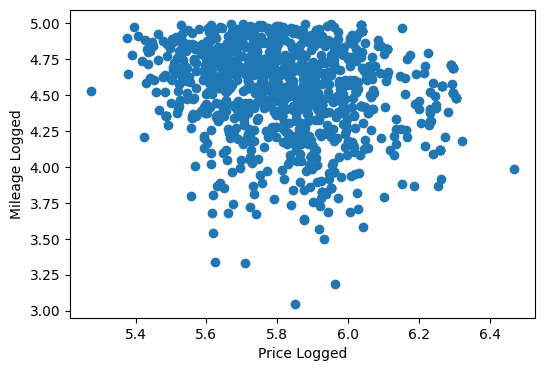

In [ ]:
fig, ax = plt.subplots(figsize = (6,4))
ax.scatter(df['Price.Logged'],df['Mileage.Logged'])
ax.set_xlabel('Price Logged')
ax.set_ylabel('Mileage Logged')
plt.show()

**With this scatterplot, we can see that there are outliers on the x and y axes. Now that I realize there are outliers, I can remove them and have a cleaner dataset.**

In [ ]:
print(np.where((df['Price.Logged']>6.4)))
print(np.where((df['Price.Logged']<5.3)))
print(np.where((df['Mileage.Logged']<3.25)))

(array([234]),)
(array([921]),)
(array([ 65, 247]),)


In [ ]:
df = df.loc[df['Price.Logged']<6.4,:]
df = df.loc[df['Price.Logged']>5.3,:]
df = df.loc[df['Mileage.Logged']>3.4,:]

**I looked through the scatterplot and found the location of the most apparent outliers. Now I can remove them from the dataframe.**

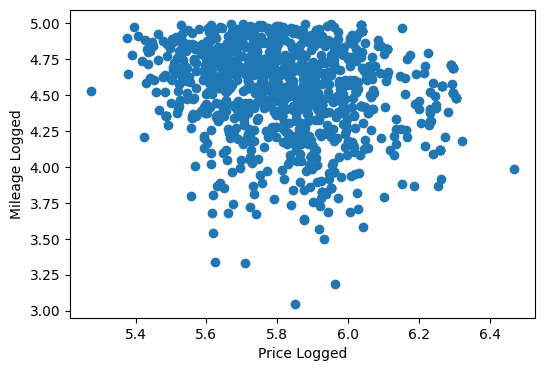

In [ ]:
fig, ax = plt.subplots(figsize = (6,4))
ax.scatter(df['Price.Logged'],df['Mileage.Logged'])
ax.set_xlabel('Price Logged')
ax.set_ylabel('Mileage Logged')
plt.show()

**I dropped the outlier rows and created a new scatterplot to ensure there were no remaining outliers. I now have clean data to use.**

**Question 1.2**

               count      mean       std       min       25%       50%  \
Make                                                                     
Chevrolet        6.0  5.611039  0.208885  5.426511  5.458383  5.538247   
Datsun           3.0  5.461708  0.015770  5.445604  5.454001  5.462398   
Ford            52.0  5.849200  0.091590  5.462398  5.802774  5.849726   
Honda           73.0  5.878748  0.146345  5.499687  5.764176  5.894870   
Hyundai        305.0  5.805870  0.173189  5.394452  5.685742  5.804821   
Jeep             4.0  6.174187  0.045637  6.110590  6.159716  6.184469   
Kia              8.0  6.207014  0.033387  6.136403  6.198356  6.211760   
MG Motors       35.0  6.270801  0.028778  6.201124  6.251992  6.266702   
Mahindra        18.0  6.036239  0.069446  5.900913  6.015764  6.039160   
Maruti Suzuki  293.0  5.740562  0.161301  5.374748  5.613842  5.721811   
Nissan           4.0  5.924295  0.170508  5.676694  5.879381  5.988366   
Renault         68.0  5.798206  0.1440

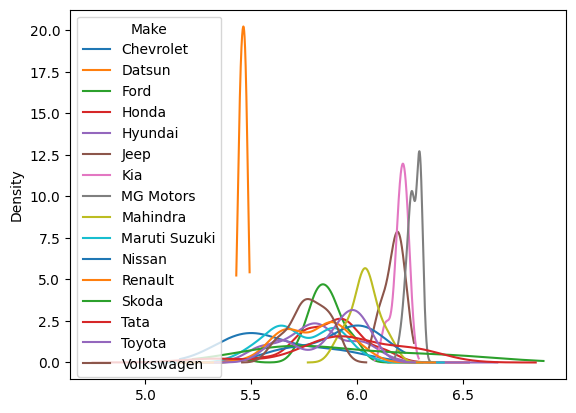

In [ ]:
group_by = 'Make'
var = 'Price.Logged'
sum_price = df.groupby('Make')['Price.Logged'].describe()
print(sum_price)
df_wide = df.pivot(columns=group_by,values=var)
print(df_wide.plot.density())

**I summarized the log of price by make, and created a kernel density plot. It appears that the most expensive cars are jeep, kia, MG motors, and Mahindra. In the summary they have the highest means, and the density plot shows them with high price/density. In general, prices appear the be right around log 5.5-6.2.**

**Q1.3**

In [ ]:
np.random.seed(100)
def pn(x):
    print(x,'\n')

X = df.loc[:,['Mileage.Logged','Seating_Capacity'] ]
y = df['Price.Logged']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=1)
TSS = np.sum( (y_test - y_train.mean())**2 )
N_test = len(y_test)

**The train/test split above is for numerical variables only.**

In [ ]:

X1 = pd.get_dummies(df['Make'], dtype=float)

X2 = pd.get_dummies(df['Make_Year'], dtype=float)

X3 = pd.get_dummies(df['Color'], dtype=float)

X4 = pd.get_dummies(df['Body_Type'], dtype=float)

X5 = pd.get_dummies(df['No_of_Owners'], dtype=float)

X6 = pd.get_dummies(df['Fuel_Type'], dtype=float)

X7 = pd.get_dummies(df['Transmission'], dtype=float)

X8 = pd.get_dummies(df['Transmission_Type'], dtype=float)

X_cat = pd.concat([X1, X2, X3, X4, X5, X6, X7, X8],axis=1)

**I one-hot encoded the categorical variables above.**

In [ ]:
np.random.seed(100)
X_cat = pd.concat([X1, X2, X3, X4, X5, X6, X7, X8],axis=1)
X_cat.columns = X_cat.columns.astype(str)
ycat = df['Price.Logged']
from sklearn.model_selection import train_test_split
X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(X_cat,ycat,test_size=.2,random_state=1)
TSS_cat = np.sum( (y_test_cat - y_train_cat.mean())**2 )
N_test_cat = len(y_test_cat)

**Above, I did a train/test split for the categorical varaibles.**

**Q1.4**

In [ ]:
# This is price regressed on numeric variables alone

from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_test, y_test)
y_hat_lm = reg.predict(X_test)
residuals_lm = y_test - y_hat_lm

SSE_lm = np.sum( (y_test-y_hat_lm)**2 )
MSE_lm = SSE_lm/N_test
RMSE_lm = (SSE_lm/N_test)**(1/2)
R2_lm = 1 - SSE_lm/TSS
print(R2_lm)
print(RMSE_lm)

0.06477816006664494
0.18685040629110247


**This is price regressed on numeric variables alone. The Rsquared and RMSE are 0.06477816006664494 and 0.18685040629110247 respectively.**

In [ ]:
# This is price regressed on categorical variables alone

reg = LinearRegression().fit(X_train_cat, y_train_cat)
reg.score(X_test_cat, y_test_cat)
y_hat_lm_cat = reg.predict(X_test_cat)
residuals_lm_cat = y_test_cat - y_hat_lm_cat

SSE_lm_cat= np.sum( (y_test_cat-y_hat_lm_cat)**2 )
MSE_lm_cat = SSE_lm_cat/N_test_cat
RMSE_lm_cat = (SSE_lm_cat/N_test_cat)**(1/2)
R2_lm_cat = 1 - SSE_lm_cat/TSS_cat
print(R2_lm_cat)
print(RMSE_lm_cat)

0.788784079288686
0.08879735951572755


**This is price regressed on categorical variables alone. The Rsquared and RMSE are 0.788784079288686 and 0.08879735951572755 respectively.**

In [ ]:
X_both = pd.concat([X, X_cat],axis=1)
X_both.columns = X_both.columns.astype(str)
y_both = df['Price.Logged']
X_train_both, X_test_both, y_train_both, y_test_both = train_test_split(X_both,y_both,test_size=.2,random_state=1)
TSS_both = np.sum( (y_test_both - y_train_both.mean())**2 )
N_test_both = len(y_test_both)

**Splitting the data into train/test for both numerical and categorical variables.**

In [ ]:
# This is price regressed on both numeric and categorical variables

reg = LinearRegression().fit(X_train_both, y_train_both)
reg.score(X_test_both, y_test_both)
y_hat_lm_both = reg.predict(X_test_both)
residuals_lm_both = y_test_both - y_hat_lm_both

SSE_lm_both= np.sum( (y_test_both-y_hat_lm_both)**2 )
MSE_lm_both = SSE_lm_both/N_test_both
RMSE_lm_both = (SSE_lm_both/N_test_both)**(1/2)
R2_lm_both = 1 - SSE_lm_both/TSS_both
print(R2_lm_both)
print(RMSE_lm_both)

0.7902022934685293
0.08849874144087026


**This is price regressed on both the numerical and categorical variables. The Rsquared and RMSE are 0.7902022934685293 and 0.08849874144087026 respectively.**

**In general, higher rsquared and lower rmse is better. Comparing the numerical model vs the categorical model, we see that the model with just categorical variables has a higher rsquared and lower rmse. We can conclude that the categorical model has a better fit due to these factors. The joint model has a higher rsquared and lower rmse than either of the other models. This makes it perform better. It isn't better by a ton, the rsquared is higher by about .01, and the rmse is lower by about .003. This isn't a lot, but the model still does technically perform better.**

**Q1.5**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
expander = PolynomialFeatures(degree=3,interaction_only=True,include_bias=False) # Create the expander
Z2 = expander.fit_transform(X_both)
names2 = expander.get_feature_names_out()
expanded_both = pd.DataFrame(data=Z2, columns = names2)

**The code above expands both the numerical and categorical variables. It interacts categorical variables, and raises other variables to the third degree.**

In [ ]:
y_both_expanded = df['Price.Logged']
X_train_exboth, X_test_exboth, y_train_exboth, y_test_exboth = train_test_split(expanded_both,y_both_expanded,test_size=.2,random_state=1)
TSS_exboth = np.sum( (y_test_exboth - y_train_exboth.mean())**2 )
N_test_exboth = len(y_test_exboth)

**I split the data into training/test for the expanded model, using both numerical and categorical variables.**

In [ ]:
reg = LinearRegression().fit(X_train_exboth, y_train_exboth)
reg.score(X_test_exboth, y_test_exboth)
y_hat_lm_exboth = reg.predict(X_test_exboth)
residuals_lm_exboth = y_test_exboth - y_hat_lm_exboth

SSE_lm_exboth= np.sum( (y_test_exboth-y_hat_lm_exboth)**2 )
MSE_lm_exboth = SSE_lm_exboth/N_test_exboth
RMSE_lm_exboth = (SSE_lm_exboth/N_test_exboth)**(1/2)
R2_lm_exboth = 1 - SSE_lm_exboth/TSS_exboth
print(R2_lm_exboth)
print(RMSE_lm_exboth)

-5.317420256281699e+20
4455405321.575797


**The code above gives the Rsquared and RMSE for the expanded numerical and categorical variables. The rsquared is -5.317420256281699e+20 and the rmse is 4455405321.575797. This rsquared is much kower than the rsquared in the last part, and the rmse is much higher (these are both horrible signs). These answers are obviously insane, because rsquared being negative means that the model is very poorly fit. That high of an rmse also means there are very imprecise predictions. I believe that I expanded the model too much. Below, I will try a few other models.**



In [ ]:
from sklearn.preprocessing import PolynomialFeatures
expander = PolynomialFeatures(degree=2,interaction_only=False,include_bias=False) # Create the expander
Z3 = expander.fit_transform(X_both)
names3 = expander.get_feature_names_out()
expanded_both1 = pd.DataFrame(data=Z3, columns = names3)

y_both_expanded1 = df['Price.Logged']
X_train_exboth1, X_test_exboth1, y_train_exboth1, y_test_exboth1 = train_test_split(expanded_both1,y_both_expanded1,test_size=.2,random_state=1)
TSS_exboth1 = np.sum( (y_test_exboth1 - y_train_exboth1.mean())**2 )
N_test_exboth1 = len(y_test_exboth1)

**For this expansion, I took out interactions and just raised the numerical varaibles to the second degree.**

In [ ]:
reg = LinearRegression().fit(X_train_exboth1, y_train_exboth1)
reg.score(X_test_exboth1, y_test_exboth1)
y_hat_lm_exboth1 = reg.predict(X_test_exboth1)
residuals_lm_exboth1 = y_test_exboth1 - y_hat_lm_exboth1

SSE_lm_exboth1= np.sum( (y_test_exboth1-y_hat_lm_exboth1)**2 )
MSE_lm_exboth1 = SSE_lm_exboth1/N_test_exboth1
RMSE_lm_exboth1 = (SSE_lm_exboth1/N_test_exboth1)**(1/2)
R2_lm_exboth1 = 1 - SSE_lm_exboth1/TSS_exboth1
print(R2_lm_exboth1)
print(RMSE_lm_exboth1)

-9.734575372204546e+20
6028305212.222128


**This is even worse than the model before. The rsquared is negative again, but lower which is honesty impressive that I could get it that low. The rmse is lower which I'm counting as a win.**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
expander = PolynomialFeatures(degree=3,interaction_only=False,include_bias=False) # Create the expander
Z4 = expander.fit_transform(X_both)
names4 = expander.get_feature_names_out()
expanded_both2 = pd.DataFrame(data=Z4, columns = names4)

y_both_expanded2 = df['Price.Logged']
X_train_exboth2, X_test_exboth2, y_train_exboth2, y_test_exboth2 = train_test_split(expanded_both2,y_both_expanded2,test_size=.2,random_state=1)
TSS_exboth2 = np.sum( (y_test_exboth2 - y_train_exboth2.mean())**2 )
N_test_exboth2 = len(y_test_exboth2)

**In the spirit of trying everything I can to see how exanding the polynomials changes the predicitions, I raised the power to the third.**



In [ ]:
reg = LinearRegression().fit(X_train_exboth2, y_train_exboth2)
reg.score(X_test_exboth2, y_test_exboth2)
y_hat_lm_exboth2= reg.predict(X_test_exboth2)
residuals_lm_exboth2 = y_test_exboth2 - y_hat_lm_exboth2

SSE_lm_exboth2= np.sum( (y_test_exboth2-y_hat_lm_exboth2)**2 )
MSE_lm_exboth2 = SSE_lm_exboth2/N_test_exboth2
RMSE_lm_exboth2 = (SSE_lm_exboth2/N_test_exboth2)**(1/2)
R2_lm_exboth2 = 1 - SSE_lm_exboth2/TSS_exboth2
print(R2_lm_exboth2)
print(RMSE_lm_exboth2)

-9.893635535027148e+19
1921828724.442955


**As you can see comparing this model to the previous one, increasing the degree of expansion makes the rsquared lower, as well as the rmse. It's good that the rmse is getting lower, but concerning that the rsquared is incredibly negative.**

**The models that I created with the polynomial expander were really bad, although this is likely due to my own mistakes (I had a little bit of trouble splitting the data correctly, but I hope that I still achieved the results we were aiming for). I'm a statistics major, and something that we talk about often is overfitting data with polynomials. As we increase the degree, it becomes more complex and the risk of overfitting becomes more apparent. This means that we may be capturing a lot of noise, which skews our predictions and prevents our model from fitting correctly. I believe that could be an explaination for what happened here. The best model from this was the first one, with a degree of 3 and interactions. The rsquared was -5.317420256281699e+20 and the rmse was 4455405321.575797. The rsquared is barley negative, but still negative which is not what we want. The rmse is incredibly high, which means our predictions are not accurate whatsoever. The best model from part 4 (numerical and categorical variables together) is a much better fit, so I will be continuing part 6 with that.**

**Q1.6**

**As a reminder, I'm using the best model from part 3. This is the model that combined the numeric and categorical variables.**

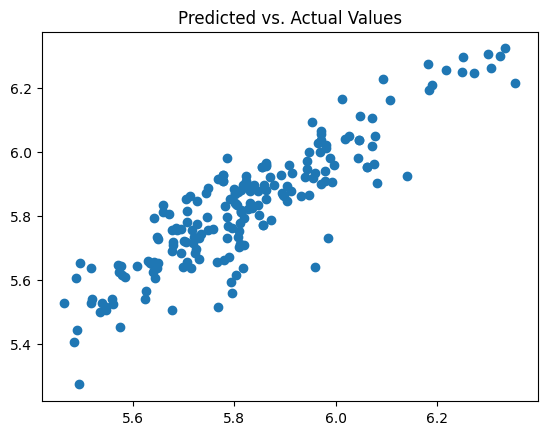

In [ ]:
reg = LinearRegression().fit(X_train_both, y_train_both)
reg.score(X_test_both, y_test_both)

#Predicted values

y_hat_lm_both = reg.predict(X_test_both)
residuals_lm_both = y_test_both - y_hat_lm_both

## True versus predicted plot:
plt.scatter(x=y_hat_lm_both,y=y_test_both)
plt.title('Predicted vs. Actual Values')
plt.show()

**This is the plot of predicted values vs actual values. As you can see, they are roughly along the diagonal. There are a few outliers, but for the most part, they follow a similar pattern. This could be indicative of a good fit.**

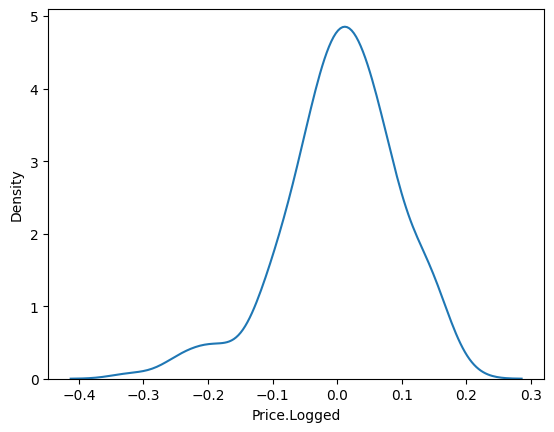

In [ ]:
# These are the errors. The residuals were calculated above.

SSE_lm_both= np.sum( (y_test_both-y_hat_lm_both)**2 )
MSE_lm_both = SSE_lm_both/N_test_both
RMSE_lm_both = (SSE_lm_both/N_test_both)**(1/2)
R2_lm_both = 1 - SSE_lm_both/TSS_both

# Kernel density plot
sns.kdeplot(residuals_lm_both)
plt.show()

**Looking at the kernel density plot, The residuals look vaguely bell shaped around zero. However, there is a tail to the left, which means there is a left(negative) skew.**

**Strengths of my model: Predicted vs actual values do not have a huge residuals, The scatterplot is fairly diagonal, which shows a relatively good fit, the rsquared is .79, (which is much higher than some of my other models, and not too shabby in general), low rmse, which shows that the predicted values are fairly accurate.**



**Weaknesses of my model: There are outliers in the scatterplot, so it is not the best fit that we could have. The rsquared could be higher, the rmse could be closer to zero. The bell curve is skewed to the left, indicating that there is a negative skew and the predictions aren't as close as they could be.**

**Q1.7**

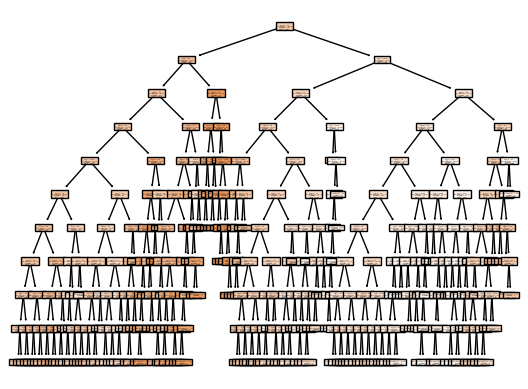

0.763403855474328
0.09398110738856096


In [ ]:
from sklearn import tree
model1 = tree.DecisionTreeRegressor(max_depth=10)
cart1 = model1.fit(X_train_both, y_train_both)
tree.plot_tree(cart1,filled=True)
plt.show()

y_hat_cart1 = cart1.predict(X_test_both)
residuals_cart1 = y_test_both - y_hat_cart1

SSE_cart1 = np.sum( (y_test_both-y_hat_cart1)**2 )
MSE_cart1 = (1/N_test_both)*np.sum( (y_test_both-y_hat_cart1)**2 )
RMSE_cart1 = (SSE_cart1/N_test_both)**(1/2)
R2_cart1 = 1 - SSE_cart1/TSS_both

print(R2_cart1)
print(RMSE_cart1)

**This is a regression tree with depth 10. The rsquared is .763 and the rmse is .09398.**

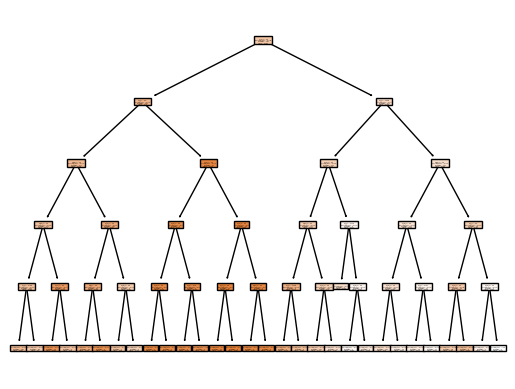

0.621212771107915
0.11891438398318399


In [ ]:
model2 = tree.DecisionTreeRegressor(max_depth=5)
cart2 = model2.fit(X_train_both, y_train_both)
tree.plot_tree(cart2,filled=True)
plt.show()

y_hat_cart2 = cart2.predict(X_test_both)
residuals_cart2 = y_test_both - y_hat_cart2

SSE_cart2 = np.sum( (y_test_both-y_hat_cart2)**2 )
MSE_cart2 = (1/N_test_both)*np.sum( (y_test_both-y_hat_cart2)**2 )
RMSE_cart2 = (SSE_cart2/N_test_both)**(1/2)
R2_cart2 = 1 - SSE_cart2/TSS_both

print(R2_cart2)
print(RMSE_cart2)

**This is a regression tree with depth 5. The rsquared is .6212 and the rmse is .1189.**

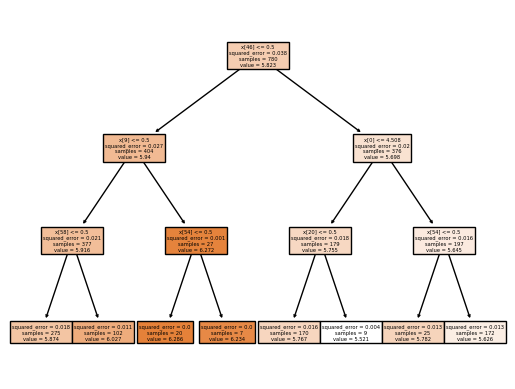

0.5509037272237389
0.12948112131614456


In [ ]:
model3 = tree.DecisionTreeRegressor(max_depth=3)
cart3 = model3.fit(X_train_both, y_train_both)
tree.plot_tree(cart3,filled=True)
plt.show()

y_hat_cart3 = cart3.predict(X_test_both)
residuals_cart3 = y_test_both - y_hat_cart3

SSE_cart3 = np.sum( (y_test_both-y_hat_cart3)**2 )
MSE_cart3 = (1/N_test_both)*np.sum( (y_test_both-y_hat_cart3)**2 )
RMSE_cart3 = (SSE_cart3/N_test_both)**(1/2)
R2_cart3 = 1 - SSE_cart3/TSS_both

print(R2_cart3)
print(RMSE_cart3)

**This is a regression tree with depth 3. the rsquared is .5509 and the rmse is .1295.**

**By far, the depth tree with the best results is depth 10. The more depth, the higher the rsquared and lower the rmse, which is the overall goal. It had a high rsquared and low rmse, while the other two had progressively worse fits.**

**Q1.8**

**My best tree has depth 10. I will be using this one for my predicted values vs true values plot and residuals plot.**

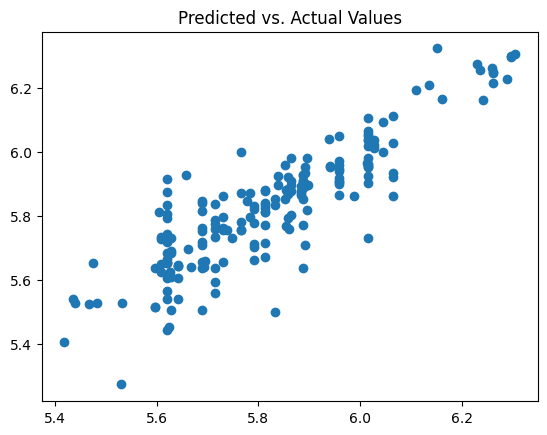

In [ ]:
# Predicted values

y_hat_cart1 = cart1.predict(X_test_both)
residuals_cart1 = y_test_both - y_hat_cart1

## True versus predicted plot:
plt.scatter(x=y_hat_cart1,y=y_test_both)
plt.title('Predicted vs. Actual Values')
plt.show()

**The predicted and true values are somewhat lined up on the diagonal, but not as much as the linear regression model. There are more outliers and it is not as closely grouped together on the diagonal.**

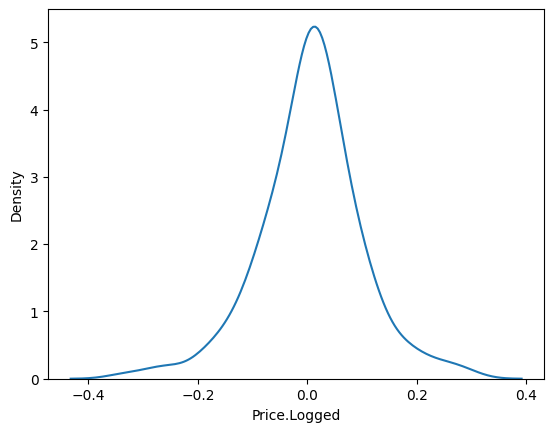

In [ ]:
sns.kdeplot(residuals_cart1)
plt.show()

**The kernel density plot shows that the residuals have a great bell shape around zero. There seems to be a slight left skew, but for the most part, it is centered. This is a good sign.**

**Q1.9**

**The linear model had a better performance on the test set. I determined this for a variety of reasons. The rsquared of the linear model had a higher rsquared than the classification model, which generally indicates a better fit. The rmse was lower in the linear model, which indicates that the predictions were closer to the true values than in the classification model. In addition, when comparing the predicted vs true value plots, the linear model was group closer together and more on the diagonal than the classification model. The residuals for the classification model produced a more bell shaped curve than the linear model, but this is not enough to make me believe that it has a better performance on the test set.**

**Q2.** The is a question about regression using decision trees and linear models. The data include wages at data science-y jobs, including

  - `Rating`: Company worker happiness score
  - `Size`: Number of employees
  - `Sector`: Part of the economy
  - `avg_salary`: Average wage
  - `job_state`: Location of work

  1. Load the `wages_hw.csv` file. Split the sample into an ~80% training set and a ~20% test set. Do any necessary cleaning, including outliers and missings.
  2. Use a linear model to regress `avg_salary` on `Sector`. Which sectors have the highest predicted wages? What is the $R^2$ and `RMSE` on the test set?
  3. Make a scatterplot of `avg_salary` and `Rating`. Is there an obvious visual relationship between the two variables? Regress `avg_salary` on `Rating` as a numeric variable: Do higher ratings predict higher or lower wages? Convert `Rating` to a one-hot encoded variable, with a category for each rating. Run a regression of `avg_salary` on the categorical version. How do your results change? Explain. Which version has a higher $R^2$ and lower `RMSE`?
  4. Now interact `Sector` with the categorical version of `Rating`, so your regressors are a (Sector, Rating) pair; this is a programming puzzle you'll have to think about, but using the `.PolynomialFeatures()` function on the one-hot encoded categorical variables is one option, and another is pre-processing a new variable that interacts `Sector` and `Rating` and then one-hot encoding the result. Regress `avg_salary` on the (Sector, Rating) pairs. How does the $R^2$ and `RMSE` on the test set compare to part 2? Interpret the coefficients; which sector-rating pairs have the highest wages?
  5. Run a linear regression of `avg_salary` on all the variables. What is the $R^2$ on the test set? How does it compare to your simpler models in 2--4?
  6. Build a decision tree by regressing `avg_salary` on `Sector`, `Rating`, and the (Sector, Rating) pairs. What are the $R^2$ and `RMSE` of your models on the test set? How do your answers compare to parts 2, 3, and 4?
  7. Build a decision tree by regressing `avg_salary` on all the other variables. What is the $R^2$ and `RMSE` on the test set?
  8. Build a linear regression or decision tree using the available variables based on your own judgment. What degrees of freedom are you giving the model to predict variation in wages across company and location attributes? What is the $R^2$ and `RMSE` of your model? How does it compare to the previous ones in the question? Why does yours perform better or worse on the test set?

**Q3.** This a question purely on categorical prediction. The data for this happen to be gathered in 1987 in Indonesia, and concern contraceptive method choice. The questions and data-gathering assumptions reflect the culture and attitudes of that time and place, but provide a good example of a categorical prediction problem on an important topic (family planning and maternal health The variables in the data are:

    - Wife's age (numerical)
    - Wife's education (categorical) 1=low, 2, 3, 4=high
    - Husband's education (categorical) 1=low, 2, 3, 4=high
    - Number of children ever born (numerical)
    - Wife's religion (binary) 0=Non-Islam, 1=Islam
    - Wife's now working? (binary) 0=Yes, 1=No
    - Husband's occupation (categorical) 1, 2, 3, 4
    - Standard-of-living index (categorical) 1=low, 2, 3, 4=high
    - Media exposure (binary) 0=Good, 1=Not good
    - Contraceptive method used (class attribute) 1=No-use, 2=Long-term, 3=Short-termhort-term

  1. Load the `contraceptiveMethodChoice.csv` data. Tabulate the `method` variable (i.e. `.value_counts()`). 1 corresponds to `No Contraception`, 3 corresponds to `Short Term` (e.g. condoms, birth control pills), and 2 corresponds to `Long Term` (e.g. IUD, sterilization). Cross tabulate `method` and `numberChildren`. Do couples that use birth control tend to have more children than those who don't?
  2. Split the sample into ~80% training data and ~20% testing data.
  3. We are now going to make a mistake. Train a regression tree to predict the contraceptive method using the other variables in the data, not a classification tree. Look at the terminal nodes in the tree: What values do they take? Does that make sense? Explain clearly what has gone wrong here.
  4. Instead of regression, use a classification tree to predict contraceptive method using the other variables in the data. How does it look different from the previous tree? What variables does the algorithm use? In broad terms, which groups of people are most likely to use each method of contraception?
  5. Compute a confusion matrix for your classification tree on the test set (Hint: There are now three categories instead of two, so the cross tabulation will be a $3 \times 3$ matrix instead of $2 \times 2$.). Compute the Accuracy of your model overall, and the Accuracy for predicting each contraceptive method.
  7. Why can't you use a linear probability model to do this exercise? Explain clearly in words.

**Q3.1**

In [ ]:
df2 = pd.read_csv('/content/assignment4/data/contraception_hw.csv')
df2.head()

,Unnamed: 0,age,edu,edu_spouse,numberChildren,religion,working,spouse_occupation,standardOfLivingIndex,mediaExposure,method
14,15,38,3,4,2,1,1,2,3,0,1
15,16,26,2,4,0,1,1,4,1,0,1
17,18,39,2,2,6,1,1,2,4,0,1
18,19,37,2,2,8,1,1,2,3,0,1
19,20,39,2,1,5,1,1,2,1,1,1


In [ ]:
print(df2['method'].value_counts())
print(pd.crosstab(df2['method'], df2['numberChildren']))

1    629
3    511
2    333
Name: method, dtype: int64
numberChildren  0    1    2    3   4   5   6   7   8   9   10  11  12  13  16
method                                                                       
1               95  143  114   70  57  44  35  18  29   5   9   6   4   0   0
2                0   46   56   70  62  36  27  19   9   3   2   2   0   1   0
3                2   87  106  119  78  55  30  12   9   8   0   3   0   1   1


**It appears that couples who use birth control do not have more children than couples that do. Method 1 is no contraception, and while there are 95 with 0 kids, there are very high numbers for 1-8 kids. For method 2 (short-term contracpetion), these numbers are almost always smaller than method 1. We can conclude that method 2 seems to have less kids than method 1. Method 3 (long-term contraception), have higher numbers than method 2, but typically lower numbers than method 1. Therefore, although couples that do not use contraception have more couples with 0 kids than the other methods, couples that use contraception still seem to have less kids than them.**

**Q3.2**

In [ ]:
new_df2 = df2.drop('age', axis=1)
new_df2 = df2.drop('numberChildren', axis=1)
new_df2 = df2.drop(df2.columns[0], axis=1)

**I removed the numeric variables and saved it as a new dataframe**

In [ ]:
X = new_df2.drop('method',axis=1)
y = new_df2['method']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=1)

**Q3.3**

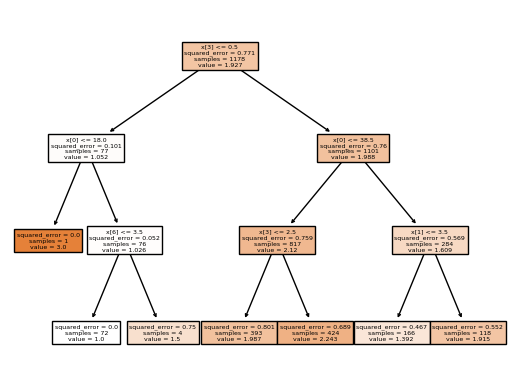

In [ ]:
from sklearn import tree
model = tree.DecisionTreeRegressor(max_depth=3) # Fit the classifier
cart = model.fit(X_train, y_train)
tree.plot_tree(cart,filled=True)
plt.show()

**The terminal nodes take values that are not whole numbers. This does not work here because we are trying to predict classification, which is a whole value (since it is method 1, 2, or 3). The values being returned are fractional numbers, which does not compute. There need to be 3 values returned (1 for each method) that classify as method 1, 2, or 3. The regression tree is trying to give us a number prediction instead. The values also need to add up to the sample, since we are classifying each sample as one of the three methods. Regression decision trees do not work when predicting categorical data.**

**Q3.4**

[Text(0.4230769230769231, 0.875, 'x[3] <= 0.5\ngini = 0.646\nsamples = 1178\nvalue = [500, 264, 414]'),
 Text(0.15384615384615385, 0.625, 'x[0] <= 18.0\ngini = 0.051\nsamples = 77\nvalue = [75, 0, 2]'),
 Text(0.07692307692307693, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.23076923076923078, 0.375, 'x[6] <= 3.5\ngini = 0.026\nsamples = 76\nvalue = [75, 0, 1]'),
 Text(0.15384615384615385, 0.125, 'gini = 0.0\nsamples = 72\nvalue = [72, 0, 0]'),
 Text(0.3076923076923077, 0.125, 'gini = 0.375\nsamples = 4\nvalue = [3, 0, 1]'),
 Text(0.6923076923076923, 0.625, 'x[0] <= 37.5\ngini = 0.653\nsamples = 1101\nvalue = [425, 264, 412]'),
 Text(0.5384615384615384, 0.375, 'x[1] <= 3.5\ngini = 0.64\nsamples = 779\nvalue = [252, 173, 354]'),
 Text(0.46153846153846156, 0.125, 'gini = 0.611\nsamples = 481\nvalue = [184, 71, 226]'),
 Text(0.6153846153846154, 0.125, 'gini = 0.646\nsamples = 298\nvalue = [68, 102, 128]'),
 Text(0.8461538461538461, 0.375, 'x[1] <= 3.5\ngini = 0.599\nsample

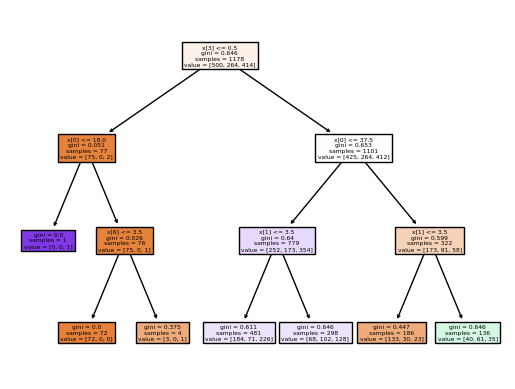

In [ ]:
model1 = tree.DecisionTreeClassifier(max_depth=3) # Fit the classifier
cart1 = model1.fit(X_train, y_train)
tree.plot_tree(cart1,filled=True)


**This tree makes much more sense. There are three values for each node, and they add up to the number of samples. Each value in each node represents a method. The first value is method 1, the second value is method 2, and the third value is method 3. Each node classifies the number of samples into one of the three methods, according to the predictor. It's much different than the regression decision tree, because it is actually classifying into one of the three methods, rather than predicting a number. It uses several variables, including age (X[0]), education (X[1]), numerChildren (X[3]), and spouse occupation (X[6]). People with less than .5 (1) kids, older than 18, and have a spouse who's occupation is 4 or higher are more likely to use method 1. People with more than .5 (1) kids, younger than 37.5, and female education is less than 3.5 are more likely to use method 3. Couples who have more than .5 kids,older than 37.5, and female education less than 3.5 are more likely to use method 1.**

**Q3.5**

In [ ]:
def performance(y_test,y_hat): # Sample code to compute classifier performance
    tab = pd.crosstab(np.array(y_hat),np.array(y_test)) # Compute confusion matrix
    #
    # Get entries from the confusion matrix:
    tp = tab.iloc[0,0]
    tn = tab.iloc[1,1]
    fp = tab.iloc[0,1]
    fn = tab.iloc[1,0]
    tot = tp+tn+fp+fn
    #
    # Compute performance statistics:
    acc = (tp+tn)/tot
    spec = tn/(tp+fn)
    sens = tp/(tp+fn)
    mcc = (tp*tn-fp*fn)/np.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))
    #
    # Return a dictionary including the confusion matrix and metrics:
    return({'confusion_matrix':tab,
            'accuracy':acc,
            'specificity':spec,
            'sensitivity':sens,
            'mcc':mcc})

In [ ]:
y_hat_cart = cart1.predict(X_test)

# Compute performance:
perf_cart = performance(y_test,y_hat_cart)
print(perf_cart)

{'confusion_matrix': col_0   1   2   3
row_0            
1      54   5  10
2       9  20   7
3      66  44  80, 'accuracy': 0.8409090909090909, 'specificity': 0.31746031746031744, 'sensitivity': 0.8571428571428571, 'mcc': 0.6304854461477478}


**The accuracy for method 1 is 54/(54+5+10) = .783. The accuracy for method 2 is 20/20+9+7 = .556. The accuracy for method 3 is 80/66+44+80 = .421.The overall accuracy is .8409, which is fairly good.**

**Q3.6**

**We cannot use a linear probability model because we are not predicting the probability of each method. We are predicting each method by classifying them as 1, 2, or 3. We are not trying to say "the probability that they will choose method 1 is:", instead we are trying to say "According to these predictors, this person is most likley to choose this method". You use classification to say these predictors show they are likely to choose this method, you use linera probability to say "they are ___ % likely to choose this method". Linear probability only works well if you have numeric variables that you can use to predict the model. Since this data was all categorical, it is more accurate to have a classification model.**

**Q4.** This is a question where we use regression and regression trees. The outcome is whether a defendant is held pre-trial in the Virginia justice system. We would like to understand how that outcome is predicted by characteristics of the defendant, particularly race. Let's be very careful/clear: We aren't saying anyone *should* be held without bond or asserting that people with different demographic variables *should* be more likely to be held, but instead trying to predict whether people with different characteristics *are empirically more likely* to be held without bond, given the available information. This is the first step we would take in investigating whether a system is fair, or how large the disparities are: Does it treat people with similar observable characteristics similarly, or not? We are going to look at a common question: Are Black defendants treated differently from white or Asian ones? (There are Native American defendants, but there are 11 in total, which is such a small number of observations that is difficult to clearly say anything about how this group is treated relative to the others.)

The variables in the data are:

  - `held_wo_bail`: Whether a defendant is held without bail before trial (Boolean logical)
  - `race`, `sex`: Categorical demographic variables
  - `is_poor`: Whether the defendant is classified as indigent
  - `prior_F`, `prior_M`: The number of prior felony and misdemeanor arrests
  - `case_type`: A categorical variable indicating a misdemeanor `M` or felony `F` or infraction `I` or special case `S`
  - `age`: Defendant's age
  - `bond`, `bond_NA`, `bond_type`: The amount of any bond, whether it is missing, and the type
  - `sentence`, `sentence_NA`, `sentence_type`: The length of any sentence, whether it is missing, and the type

1. Load the `pretrial_data.csv` data. Notice that there are `nan`s, but the data are relatively clean. Because there are `.nan`s among variables you won't use, you'll want to narrow down your analysis to the relevant variables before dropping or imputing missing values.
2. Create a dummy variable indicating that the defendant is Black.
3. Regress `held` on `Black`. What is the slope coefficient Interpret the coefficient on the Black dummy variable: How much more likely is a black person to be held without bail? What is the $R^2$ of the model?
4. Before doing this question, please think for a few minutes about how to make the process of running these regressions as efficient as possible, before jumping into writing code. Repeat part 2, for the following specifications, keeping track of the coefficient on the Black dummy variable each time:
      - `held` on `Black` and `sex`
      - `held` on `Black` and `sex` and `is_poor`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F` and `case_type`
What happens to the coefficient on the Black dummy variable as you include more regressors/features/controls in the regression? Explain your findings.
5. Suppose we don't want to see just `Black` and `sex`, but `Black` interacted with `sex`: Are Black men and Black women treated systemically differently from the rest of the population? Implement this in a regression, and explain your findings.
6. Imagine someone argued we should use these kinds of models to help a judge or magistrate make bail decisions (you could obviously go back and make this kind of model for the bond and sentence variables, then deploy it on new cases to predict what their bond and sentence values would be). What concerns would you have? Do you think society should be using data-driven and automated tools like that? Explain your concerns clearly.

**Q5.** This is a math question to review the derivation of the OLS estimator (but only if you are into that kind of thing!). We are going to do it slightly differently from what we did in class, though. We will use a linear predictor and minimize the Sum of Squared Errors, just as in class. But, we are going to de-mean $X$ first, creating another variable $z_i = x_i - \bar{x}$ where
$$
\bar{x} = \dfrac{1}{N} \sum_{i=1}^N x_i,
$$
so the model is $\hat{y}_i = a + b z_i$ and the `SSE` is
$$
\text{SSE}(a,b) = \sum_{i=1}^N (y_i - a - bz_i)^2.
$$

  1. Take partial derivatives of the `SSE` with respect to $a$ and $b$. You should get

\begin{eqnarray*}
\sum_{i=1}^N -2(y_i - a- bz_i) &=& 0 \\
\sum_{i=1}^N -2(y_i - a - bz_i)z_i &=& 0.
\end{eqnarray*}

  2. Solve for the solutions to the above equations. Big hint: $\bar{z} = 0$, since we subtracted the mean of $x$ from $x$ to get $z$. You should get

\begin{eqnarray*}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})z_i}{\sum_{i=1}^N z_i^2}.
\end{eqnarray*}

  3. Substitute $z_i = x_i - \bar{x}$ back into the above equations. You should get
  
\begin{eqnarray*}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})(x_i-\bar{x})}{\sum_{i=1}^N (x_i-\bar{x})^2},
\end{eqnarray*}

which can be written in terms of sample covariance and sample variance as:

\begin{eqnarray*}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\text{cov}(x,y)}{\text{var}(x)}.
\end{eqnarray*}

This is typically the preferred way of expressing the OLS coefficients.

4. When will $b^*$ be large or small, depending on the relationship between $x$ and $y$ and the amount of "noise"/variance in $x$? What does $a^*$ represent?
5. Suppose you have measurement error in $x$ which artificially inflates its variance (e.g. bad data cleaning). What happens to the $b^*$ coefficient? How will affect your ability to predict? (This phenomenon is called **attenuation**.)
6. Let's return to the question of *outliers*. With your formula for the OLS coefficients $(a^*,b^*)$, explain what happens if you significantly increase a single value of the outcome/target/response variable $y_i$ or one of the predictor/explanatory/covariate variables $x_i$. If values for some extreme observations are exerting significant influence over the regression coefficients, will the model perform well on for more average observations?